


# Artigo Alocação Ótima
**Autor** Sílvio Ferreira Gomes Júnior
---


-----------------------------------------------------------------

In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [ ]:
import pandas as pd
import numpy as np
import gc
import itertools
from __future__ import print_function
from ortools.linear_solver import pywraplp

In [ ]:
path = 'https://raw.githubusercontent.com/rmf87-unb/ppca-aed-artigo/refs/heads/main/fase%20I/dados_algoritmo2.txt'

dados = pd.read_csv(path, sep=';',decimal=',',encoding='UTF-8')

In [ ]:
dados.head()

,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM
0,1,3586,1.0,666.52
1,1,3587,1.0,666.52
2,1,3588,1.0,666.52
3,1,3589,1.0,666.52
4,1,3590,1.0,666.52


In [ ]:
dados.shape

(1513281, 4)

In [ ]:
cargo_qtd = dados.groupby('IDENTIFICADOR')['CARGO'].count().reset_index()

In [ ]:
cargo_qtd

,IDENTIFICADOR,CARGO
0,1,4849
1,2,4845
2,3,4840
3,4,4840
4,5,4840
...,...,...
312,313,4840
313,314,4840
314,315,4840
315,316,4296


In [ ]:
cargo_qtd['CARGO'].describe()

,CARGO
count,317.000000
mean,4773.757098
std,420.754755
min,5.000000
25%,4840.000000
50%,4840.000000
75%,4840.000000
max,9680.000000


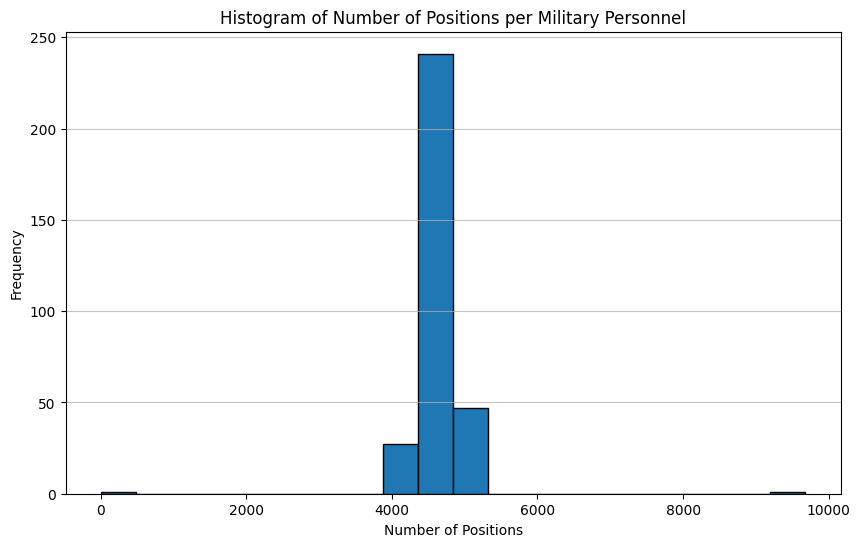

In [ ]:
# prompt: crie um histograma para a variável cargo_qtd['CARGO']

import matplotlib.pyplot as plt

# Assuming 'cargo_qtd' DataFrame is already loaded as in your provided code.

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(cargo_qtd['CARGO'], bins=20, edgecolor='black') # You can adjust the number of bins
plt.title('Histogram of Number of Positions per Military Personnel')
plt.xlabel('Number of Positions')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Deixando somente os militares que tinham à disposição 4840 cargos:

In [ ]:
idt = cargo_qtd[(cargo_qtd['CARGO']==4840)]['IDENTIFICADOR']

In [ ]:
idt

,IDENTIFICADOR
2,3
3,4
4,5
7,8
8,9
...,...
311,312
312,313
313,314
314,315


In [ ]:
#dados filtrado

dados2 = dados[dados['IDENTIFICADOR'].isin(idt)]



In [ ]:
dados2['CARGO'].value_counts()

,count
CARGO,
2087,220
2925,220
2923,220
2922,220
2921,220
...,...
1283,220
1282,220
1281,220


Como podemos verificar na tabela acima, quando selecionamos somente militares com a quantidade supracitada de cargos, a base acaba ficando com somente 220 militares. O código abaixo serve para conferir se todos os militares possuem os mesmos codigos de cargos possíveis.

In [ ]:
igual=0
diferente=0

for cargo in dados2['CARGO'].unique():
  if dados2[dados2['CARGO'] == cargo].shape[0] > 220:
    diferente+=1
  else:
    igual=igual+1

print(f'igual: {igual}')
print(f'diferente: {diferente}')

igual: 4840
diferente: 0


De forma a ajustar os índices dos identificadores dos militares e cargos, decidiu-se por renomeá-los para ficar mais fácil, ao final, a identificação da atribuição.

In [ ]:
dados2 = dados2.sort_values(by=['CARGO', 'IDENTIFICADOR'], ascending=[True, True])

In [ ]:
count = 0
count_list = []


current_cargo = None
for index, row in dados2.iterrows():
    if row['CARGO'] != current_cargo:
        count = 0
        current_cargo = row['CARGO']
    count_list.append(count)
    count += 1


dados2['IDENTIFICADOR2'] = count_list


dados2


,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2
10235,3,1,0.65957,3415.07,0
17802,4,1,0.42553,1758.24,1
20865,5,1,0.65957,801.75,2
37498,8,1,0.97872,1604.70,3
38200,9,1,0.87234,754.90,4
...,...,...,...,...,...
1484881,312,5219,0.87234,940.81,215
1494315,313,5219,0.74468,940.81,216
1494652,314,5219,0.51064,1306.77,217
1504011,315,5219,0.19149,711.04,218


In [ ]:
dados2 = dados2.sort_values(by=['IDENTIFICADOR2', 'CARGO'], ascending=[True, True])

In [ ]:
dados2

,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2
10235,3,1,0.65957,3415.07,0
10236,3,2,0.65957,3415.07,0
10237,3,3,0.65957,3415.07,0
10238,3,4,0.65957,3415.07,0
10239,3,5,0.65957,3415.07,0
...,...,...,...,...,...
1513133,317,5215,0.46809,711.04,219
1513134,317,5216,0.46809,711.04,219
1513135,317,5217,0.46809,711.04,219
1513136,317,5218,0.46809,711.04,219


In [ ]:
count = 0
count_list = []


current_cargo = None
for index, row in dados2.iterrows():
    if row['IDENTIFICADOR2'] != current_cargo:
        count = 0
        current_cargo = row['IDENTIFICADOR2']
    count_list.append(count)
    count += 1


dados2['CARGO2'] = count_list


dados2

,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2,CARGO2
10235,3,1,0.65957,3415.07,0,0
10236,3,2,0.65957,3415.07,0,1
10237,3,3,0.65957,3415.07,0,2
10238,3,4,0.65957,3415.07,0,3
10239,3,5,0.65957,3415.07,0,4
...,...,...,...,...,...,...
1513133,317,5215,0.46809,711.04,219,4835
1513134,317,5216,0.46809,711.04,219,4836
1513135,317,5217,0.46809,711.04,219,4837
1513136,317,5218,0.46809,711.04,219,4838


In [58]:
dados3 = dados2[['IDENTIFICADOR','CARGO','IDENTIFICADOR2','CARGO2','PERCENT_PRI','DISTANCE_KM']]

In [59]:
#ajustando a escala da variável DISTANCE_KM para que varie de 0 a 1

dados3['DISTANCE_KM2'] = (dados3['DISTANCE_KM'] / dados3['DISTANCE_KM'].max())

<ipython-input-59-37d9825a4fde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados3['DISTANCE_KM2'] = (dados3['DISTANCE_KM'] / dados3['DISTANCE_KM'].max())


In [60]:
dados3['DISTANCE_KM'].max()

3958.78

In [61]:
#ajustando os pesos para PERCENT_PRI E DISTANCE_KM para que vire somente 1 variável

a=0.5
b=0.5

dados3['valor_ref'] = a*dados3['PERCENT_PRI'] + b*dados3['DISTANCE_KM2']

dados3

<ipython-input-61-a524b288d58d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados3['valor_ref'] = a*dados3['PERCENT_PRI'] + b*dados3['DISTANCE_KM2']


,IDENTIFICADOR,CARGO,IDENTIFICADOR2,CARGO2,PERCENT_PRI,DISTANCE_KM,DISTANCE_KM2,valor_ref
10235,3,1,0,0,0.65957,3415.07,0.862657,0.761114
10236,3,2,0,1,0.65957,3415.07,0.862657,0.761114
10237,3,3,0,2,0.65957,3415.07,0.862657,0.761114
10238,3,4,0,3,0.65957,3415.07,0.862657,0.761114
10239,3,5,0,4,0.65957,3415.07,0.862657,0.761114
...,...,...,...,...,...,...,...,...
1513133,317,5215,219,4835,0.46809,711.04,0.179611,0.323850
1513134,317,5216,219,4836,0.46809,711.04,0.179611,0.323850
1513135,317,5217,219,4837,0.46809,711.04,0.179611,0.323850
1513136,317,5218,219,4838,0.46809,711.04,0.179611,0.323850


#3 - Modelagem e otimização
<a id="cap3"></a>

Agora partiremos para a modelagem do problema. Consideraremos que o número de militares $n$ é igual ao número de cargos $m$, ou seja, $n=m$.

1. Definição do conjunto de decisão:

Seja $x_{ij}$ uma variável binária que assume valor 1 se o  militar $i$ ocupa o cargo $j$ e 0 caso contrário, ou seja $x_{ij} \in \{0,1\}$.

2. Função objetivo:

Dada uma matriz de custos $C$, onde $c_{ij}$ representa o custo para alocar o militar $i$ no cargo $j$, o objetivo é minimizar o custo total de alocação dos militares, ou seja:

$$min \sum_{i}\sum_{j} c_{ij} x_{ij}$$

3. Restrições:

Somente um militar pode ocupar no máximo um cargo, ou seja,

$$\sum_{j} x_{ij} \le 1 \forall i$$

De forma semelhante, um cargo só pode ser ocupado por no máximo um militar, ou seja,

$$\sum_{i} x_{ij} \le 1 \forall j$$

Como, no caso em questão, temos mais cargos que militares para preencher e decidimos, a priori, que $n=m$, criaremos militares fictícios e atribuiremos o pior custo (valor_ref=1) para que estes sejam alocados em cargos que não foram escolhidos pelos militares reais. Ao final, se um identificador que não existe for alocado em um cargo, quer dizer que esse cargo ficará vazio.

In [89]:
base_final = dados3[['IDENTIFICADOR2','CARGO2','valor_ref']].copy()

In [90]:
base_final

,IDENTIFICADOR2,CARGO2,valor_ref
10235,0,0,0.761114
10236,0,1,0.761114
10237,0,2,0.761114
10238,0,3,0.761114
10239,0,4,0.761114
...,...,...,...
1513133,219,4835,0.323850
1513134,219,4836,0.323850
1513135,219,4837,0.323850
1513136,219,4838,0.323850


In [91]:
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment
from sklearn import preprocessing


pivoted_data = base_final.pivot_table(
    values="valor_ref", index="IDENTIFICADOR2", columns="CARGO2", aggfunc="max"
).fillna(1)

print(pivoted_data.head())


cost_matrix = pivoted_data.to_numpy()

# função de otimização
lin, col = linear_sum_assignment(cost_matrix)


total_cost = cost_matrix[lin, col].sum()

for i, j in zip(lin, col):
    print(
        f"Militar {pivoted_data.index[i]} no cargo {pivoted_data.columns[j]} com custo {cost_matrix[i,j]}"
    )

print(f"custo total {total_cost}")

CARGO2              0         1         2         3         4         5     \
IDENTIFICADOR2                                                               
0               0.761114  0.761114  0.761114  0.761114  0.761114  0.761114   
1               0.434833  0.434833  0.434833  0.434833  0.434833  0.434833   
2               0.431047  0.431047  0.431047  0.431047  0.431047  0.431047   
3               0.692036  0.692036  0.692036  0.692036  0.692036  0.692036   
4               0.531515  0.531515  0.531515  0.531515  0.531515  0.531515   

CARGO2              6         7         8         9     ...      4830  \
IDENTIFICADOR2                                          ...             
0               0.761114  0.761114  0.761114  0.761114  ...  0.682265   
1               0.434833  0.434833  0.434833  0.434833  ...  0.174910   
2               0.431047  0.431047  0.431047  0.431047  ...  0.266296   
3               0.692036  0.692036  0.692036  0.692036  ...  0.365626   
4              

In [92]:

filtered_data20 = dados3[dados3['IDENTIFICADOR2'].between(0, 19)]

# Create a new table (DataFrame)
dados3_filtrado20 = filtered_data20.copy() # Use .copy() to avoid SettingWithCopyWarning




In [93]:
dados3_filtrado20

,IDENTIFICADOR,CARGO,IDENTIFICADOR2,CARGO2,PERCENT_PRI,DISTANCE_KM,DISTANCE_KM2,valor_ref
10235,3,1,0,0,0.65957,3415.07,0.862657,0.761114
10236,3,2,0,1,0.65957,3415.07,0.862657,0.761114
10237,3,3,0,2,0.65957,3415.07,0.862657,0.761114
10238,3,4,0,3,0.65957,3415.07,0.862657,0.761114
10239,3,5,0,4,0.65957,3415.07,0.862657,0.761114
...,...,...,...,...,...,...,...,...
149392,32,5215,19,4835,0.38298,226.86,0.057306,0.220143
149393,32,5216,19,4836,0.38298,226.86,0.057306,0.220143
149394,32,5217,19,4837,0.38298,226.86,0.057306,0.220143
149395,32,5218,19,4838,0.38298,226.86,0.057306,0.220143


In [94]:
base_final_f20 = dados3_filtrado20[['IDENTIFICADOR2','CARGO2','valor_ref']].copy()

In [95]:
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment
from sklearn import preprocessing


pivoted_data = base_final_f20.pivot_table(
    values="valor_ref", index="IDENTIFICADOR2", columns="CARGO2", aggfunc="max"
).fillna(1)

print(pivoted_data.head())


cost_matrix = pivoted_data.to_numpy()

# função de otimização
lin, col = linear_sum_assignment(cost_matrix)


total_cost = cost_matrix[lin, col].sum()

for i, j in zip(lin, col):
    print(
        f"Militar {pivoted_data.index[i]} no cargo {pivoted_data.columns[j]} com custo {cost_matrix[i,j]}"
    )

print(f"custo total {total_cost}")

CARGO2              0         1         2         3         4         5     \
IDENTIFICADOR2                                                               
0               0.761114  0.761114  0.761114  0.761114  0.761114  0.761114   
1               0.434833  0.434833  0.434833  0.434833  0.434833  0.434833   
2               0.431047  0.431047  0.431047  0.431047  0.431047  0.431047   
3               0.692036  0.692036  0.692036  0.692036  0.692036  0.692036   
4               0.531515  0.531515  0.531515  0.531515  0.531515  0.531515   

CARGO2              6         7         8         9     ...      4830  \
IDENTIFICADOR2                                          ...             
0               0.761114  0.761114  0.761114  0.761114  ...  0.682265   
1               0.434833  0.434833  0.434833  0.434833  ...  0.174910   
2               0.431047  0.431047  0.431047  0.431047  ...  0.266296   
3               0.692036  0.692036  0.692036  0.692036  ...  0.365626   
4              

In [96]:
filtered_data100 = dados3[dados3['IDENTIFICADOR2'].between(0, 99)]


dados3_filtrado100 = filtered_data100.copy()

In [97]:
base_final_f100 = dados3_filtrado100[['IDENTIFICADOR2','CARGO2','valor_ref']].copy()

In [98]:
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment
from sklearn import preprocessing


pivoted_data = base_final_f100.pivot_table(
    values="valor_ref", index="IDENTIFICADOR2", columns="CARGO2", aggfunc="max"
).fillna(1)

print(pivoted_data.head())


cost_matrix = pivoted_data.to_numpy()

# função de otimização
lin, col = linear_sum_assignment(cost_matrix)


total_cost = cost_matrix[lin, col].sum()

for i, j in zip(lin, col):
    print(
        f"Militar {pivoted_data.index[i]} no cargo {pivoted_data.columns[j]} com custo {cost_matrix[i,j]}"
    )

print(f"custo total {total_cost}")

CARGO2              0         1         2         3         4         5     \
IDENTIFICADOR2                                                               
0               0.761114  0.761114  0.761114  0.761114  0.761114  0.761114   
1               0.434833  0.434833  0.434833  0.434833  0.434833  0.434833   
2               0.431047  0.431047  0.431047  0.431047  0.431047  0.431047   
3               0.692036  0.692036  0.692036  0.692036  0.692036  0.692036   
4               0.531515  0.531515  0.531515  0.531515  0.531515  0.531515   

CARGO2              6         7         8         9     ...      4830  \
IDENTIFICADOR2                                          ...             
0               0.761114  0.761114  0.761114  0.761114  ...  0.682265   
1               0.434833  0.434833  0.434833  0.434833  ...  0.174910   
2               0.431047  0.431047  0.431047  0.431047  ...  0.266296   
3               0.692036  0.692036  0.692036  0.692036  ...  0.365626   
4              

In [102]:
##CLAUDE SONNET 3.5

import pandas as pd
import numpy as np
from scipy.optimize import linear_sum_assignment

# Leitura do arquivo
df = filtered_data20[['CARGO2','IDENTIFICADOR2','PERCENT_PRI','DISTANCE_KM']]

# Normalização da distância
min_dist = df['DISTANCE_KM'].min()
max_dist = df['DISTANCE_KM'].max()
dist_norm = (df['DISTANCE_KM'] - min_dist) / (max_dist - min_dist)

# Criação da matriz de custos combinados (usando pesos iguais para ambos os critérios)
w1, w2 = 0.5, 0.5  # Pesos para PERCENT_PRI e DISTANCE_KM respectivamente
score = (w1 * df['PERCENT_PRI'] + w2 * dist_norm) / (w1 + w2)

# Criar matriz de custos
funcionarios = df['IDENTIFICADOR2'].unique()
cargos = df['CARGO2'].unique()

cost_matrix = np.full((len(funcionarios), len(cargos)), np.inf)

for idx, row in df.iterrows():
    i = np.where(funcionarios == row['IDENTIFICADOR2'])[0][0]
    j = np.where(cargos == row['CARGO2'])[0][0]
    cost_matrix[i,j] = score[idx]

# Aplicar o método húngaro
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Criar dataframe com os resultados
resultados = pd.DataFrame({
    'IDENTIFICADOR': funcionarios[row_ind],
    'CARGO_ALOCADO': cargos[col_ind],
    'CUSTO': cost_matrix[row_ind, col_ind]
})

print("Estatísticas da alocação:")
print(f"Custo total: {resultados['CUSTO'].sum():}")
print(f"Custo médio: {resultados['CUSTO'].mean():.2f}")
print(f"Custo mínimo: {resultados['CUSTO'].min():.2f}")
print(f"Custo máximo: {resultados['CUSTO'].max():.2f}")

# Created/Modified files during execution:
print("\nArquivos criados/modificados:")
print("resultados_alocacao.csv")

Estatísticas da alocação:
Custo total: 0.2553500000000001
Custo médio: 0.01
Custo mínimo: 0.01
Custo máximo: 0.04

Arquivos criados/modificados:
resultados_alocacao.csv


In [105]:
##GEMINI 2.0 PRO


import pandas as pd
import numpy as np
from scipy.optimize import linear_sum_assignment

# Load the data
data = filtered_data20[['CARGO2','IDENTIFICADOR2','PERCENT_PRI','DISTANCE_KM']]

# --- Weighted Sum Method ---

# 1. Define Weights
weight_pri = 0.5
weight_dist = 0.5

# 2. Normalize (Min-Max Scaling)
data['PERCENT_PRI_NORM'] = (data['PERCENT_PRI'] - data['PERCENT_PRI'].min()) / (data['PERCENT_PRI'].max() - data['PERCENT_PRI'].min())
data['DISTANCE_KM_NORM'] = (data['DISTANCE_KM'] - data['DISTANCE_KM'].min()) / (data['DISTANCE_KM'].max() - data['DISTANCE_KM'].min())

# 3. Calculate Combined Score
data['SCORE'] = (weight_pri * data['PERCENT_PRI_NORM']) + (weight_dist * data['DISTANCE_KM_NORM'])

# 4. Create Cost Matrix (for Hungarian Algorithm)
# Reshape the SCORE data into a matrix where rows are employees and columns are positions.
# This assumes you have an equal number of employees and positions.  If not, you'll need to adapt.
num_employees = data['IDENTIFICADOR2'].nunique()
num_positions = data['CARGO2'].nunique()


cost_matrix = data.pivot(index='IDENTIFICADOR2', columns='CARGO2', values='SCORE').to_numpy()

# Handle potential NaN values (if some employee-position combinations are missing)
cost_matrix = np.nan_to_num(cost_matrix, nan=np.inf)  # Replace NaN with infinity

# 5. Solve the Assignment Problem (Hungarian Algorithm)
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# --- Results ---
print("Optimal Assignment:")
assignments = []
for i, j in zip(row_ind, col_ind):
    employee_id = data['IDENTIFICADOR2'].unique()[i]
    position_id = data['CARGO2'].unique()[j]
    assignments.append((employee_id, position_id))
    print(f"Employee {employee_id} -> Position {position_id}")

# Get the details of the optimal assignments
optimal_assignments = pd.DataFrame(assignments, columns=['IDENTIFICADOR2', 'CARGO2'])
optimal_assignments = optimal_assignments.merge(data, on=['IDENTIFICADOR2', 'CARGO2'])

print("\nOptimal Assignment Details:")
print(optimal_assignments)

print(f"\nTotal combined score: {optimal_assignments['SCORE'].sum():}")
print(f"Total normalized PERCENT_PRI: {optimal_assignments['PERCENT_PRI_NORM'].sum():.4f}")
print(f"Total normalized DISTANCE_KM: {optimal_assignments['DISTANCE_KM_NORM'].sum():.4f}")
print(f"Total original PERCENT_PRI: {optimal_assignments['PERCENT_PRI'].sum():.4f}")
print(f"Total original DISTANCE_KM: {optimal_assignments['DISTANCE_KM'].sum():.4f}")

# Created/Modified files during execution:
# No files are created or modified.


Optimal Assignment:
Employee 0 -> Position 1999
Employee 1 -> Position 337
Employee 2 -> Position 1796
Employee 3 -> Position 2105
Employee 4 -> Position 1956
Employee 5 -> Position 3231
Employee 6 -> Position 1771
Employee 7 -> Position 2302
Employee 8 -> Position 338
Employee 9 -> Position 3232
Employee 10 -> Position 3233
Employee 11 -> Position 339
Employee 12 -> Position 2718
Employee 13 -> Position 4528
Employee 14 -> Position 30
Employee 15 -> Position 340
Employee 16 -> Position 341
Employee 17 -> Position 1663
Employee 18 -> Position 1797
Employee 19 -> Position 3234

Optimal Assignment Details:
    IDENTIFICADOR2  CARGO2  PERCENT_PRI  DISTANCE_KM  PERCENT_PRI_NORM  \
0                0    1999      0.04255          0.0          0.021732   
1                1     337      0.02128          0.0          0.000000   
2                2    1796      0.02128          0.0          0.000000   
3                3    2105      0.02128          0.0          0.000000   
4                4

<ipython-input-105-9fc7b150fb24>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PERCENT_PRI_NORM'] = (data['PERCENT_PRI'] - data['PERCENT_PRI'].min()) / (data['PERCENT_PRI'].max() - data['PERCENT_PRI'].min())
<ipython-input-105-9fc7b150fb24>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISTANCE_KM_NORM'] = (data['DISTANCE_KM'] - data['DISTANCE_KM'].min()) / (data['DISTANCE_KM'].max() - data['DISTANCE_KM'].min())
<ipython-input-105-9fc7b150fb24>:22: SettingWithCopyWarning: 
A value is try